# An introduction to Jupyter notebooks and the PyData stack

A Jupyter notebook (formally iPython) is an interactive environment for Python, and it's probably the best way of using Python for data manipulation.  You may ask: "I can just run python interactively from the terminal, why do I need jupyter?"  Well, that's a fair question, and the answer will hopefully become clear as we work through this notebook.

Jupyter notebooks are broken down into **cells**.  We're in the topmost cell of this notebook at the moment.  Cells come in three flavors:

* **Markdown cells** allows you to edit the text in Markdown.  These cells are used for exposition, discussion, and general formatting.  Think of them as extended comments that can be formatted beautifully, and can contain [links](http://www.jupyter.org), bulleted lists, etc.  Anything that Markdown can!  It even allows for LaTeX:
$$\int_{1}^{\sqrt[3]{3}} z^2 dz \cdot cos\left(\frac{3\cdot\pi}{9}\right) = \ln \left(\sqrt[3]{e}\right)$$
* **Code cells** contain code (for us, Python code).  These cells can contain code as short as one line, or as long as you'd like!  (Actually, I have no idea what the maximum length is.  I've had cells well over 100 lines long though).  They have some basic text editor support, so they'll help you with indentation, tab completion, etc., but they won't be able to do some of the magic that true editors like Atom or Sublime can handle.  They're also interactive in the same way that the Python interpretter in interactive mode is.  Type `15*4 %3` and it returns the answer, no need to `print` out everything.

There's one more, but it's not used as often:

* **Raw cells** are used when you want to hack the notebook to make it fancier.  We won't be using them tons, but it's good to know they exist.

How about a little demonstation?  Run the code cell below with `shift + enter`

In [ ]:
def is_prime(n):
    """ Determine whether n is prime."""
    k = 2
    while k*k <= n:
        if n % k == 0:
            return False
        k += 1
    return True

x = [x for x in range(2,401) if is_prime(x)]

print(*x)

In [ ]:
# As proof that the function is in memory, let's query the function
print(is_prime, type(is_prime), is_prime(57), sep="\n"*2)

## Editing a notebook: Command mode and Edit mode

While working with a notebook, you are always in one of two modes.

1. In **Edit mode** you can edit the content of a cell.  You're in edit mode in a cell when the left border of the cell is green.  It acts like a text file inside a text editor, and has some helpful syntax highlighting.  If you're editing a Markdown cell, it will look significantly different.  If you're editing a code cell, it will look mostly the same.  To *run* the cell, you have a few options:
 * press `command + enter` or `ctrl + enter` to run the cell and exit edit mode.  Running a markdown cell will render it, and running a code cell performs as you expect.
 * press `shift + enter` to run the cell and travel to the next cell below, possibly inserting a new one.  This is the standard command when you're building the notebook.
1. In **Command mode** you have access to your cells in a larger-scale way.  You're in command mode on a cell when the left border of the cell is blue.  You can press `up` or `down` to move between cells, and press `enter` to enter edit mode on the currently selected cells.  You can also cut, copy, paste, and delete cells with appropriate keyboard commands.  Open the *Command Palette* (the keyboard in the top center of the toolbar) to see all the commands you can use in Command mode.

## Linearity of code: the kernel

A notebook has a **kernel** attached to it.  Think of it as the interactive python interpreter running behind the scenes, executing your commands when you send them.  There are two forms of "linearity" (or temporal/time state) going on here, and it can be a bit confusing to new Jupyter users:

* **Kernel Linearity**: After you execute a code cell, it gives you its output and places a number next to the top of the cell.  This number is the *order of cell execution* in the kernel.  It's the order the kernel is receiving.  This means you can run cells, tweak them and run them again, run something "below" a cell in the notebook, then come back and run the upper cell, *etc.*, and the kernel will keep track of this in terms of the order in which you ran them **chronologically**.  This is the order you want to keep in mind.  It's really useful!  You can start out with a junky-looking notebook, figure out your data analysis, realize you want to change stuff "in the past", and just go back and change them.  Once you get used to this, you'll love it.
* **Cell Linearity**: There is an obvious visual order to the cells: the top ones "go first", and the lower ones "go next".  This isn't exactly necessary, though.  It definitely is the goal of the *final product* to go linearly, but programming, and especially data analysis, isn't like reading an essay.  Very often, you'll need to go back and change things, then rerun all the cells that come after the one you just edited.  You may type one line in a cell, hit `shift + enter` to see the output and move on to the next cell, then do that three more times.  You then realize that you'd prefer to have done all that at once, and you can merge those three cells together.  It's a workflow that I hope you'll learn to love.

Play around with it now: use an uninitialized variable `my_hat` in a cell, then hit `esc` to leave the cell without running (or hit `shift + enter` to see the error.  Below that, create a cell in which you give the variable a value, then run that cell, followed by the original cell: 

In [ ]:
# Press `shift+enter` to see an error

print(my_hat)

In [ ]:
# run this cell, then re-run the above cell!

my_hat = "Oh, now it works!"

You'll get the hang of it in time.  One other thing to note about jupyter notebooks is that, unlike the python interpretter, you have easy access to your shell (bash, zsh, or cmd, most likely) by using the `!` operator:

In [ ]:
!echo "Hello from a text file!" > hello.txt

In [ ]:
## Let's see the file we just made:

# I'm on a windows machine as I create this, so I'll use: 
#!dir 

# But if you're on a *nix machine (like a MacBook) you should use: 
!ls

In [ ]:
# Python command to open the text file we just made:
with open("hello.txt") as f:
    print(f.read())

In [ ]:
# Again, the windows commands: 
#!del hello.txt

# But if you're on a *nix machine you should use: 
!rm hello.txt

Because you can access the terminal from jupyter, you can use it to access [pip](https://docs.python.org/3/installing/index.html) to install libraries!

Notice that this makes a somewhat long printout.  In your final submission of a notebook, you should remove all the long printouts to have a more readable notebook.  Now let's move on to something more interesting.

# Visualizing some standard datasets

Jupyter notebooks are a great way to work with data.  To describe this, let's load a famous dataset and work with it.

Switch to the diabetes dataset! https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes

In [1]:
# standard import statements.  We'll understand these soon enough!
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from itertools import combinations
from sklearn import datasets
from sklearn.linear_model import LinearRegression

# Jupyter "magics": lines beginning with a `%` are how you talk to Jupyter.  Here, I'm telling 
#   Jupyter to display matplotlib plots as inline, as opposed to the default of having them pop
#   up in their own window, buried behind everything else.
# Another option is `matplotlib notebook`, which gives the plot a few more features, 
#   but those features are usually not that necessary unless you're needing to manipulate the 
#   graphic, like in a 3d plot, or save the individual plot to a .png file.
%matplotlib inline

# This just makes my plots look nice; it's completely optional
plt.style.use("fivethirtyeight") 

# Now, load the data from scikit-learn, a machine learning library
diabetes = datasets.load_diabetes()

# What's in this object?
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [2]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
X = diabetes.data

# What is X?
type(X)

numpy.ndarray

[NumPy](https://docs.scipy.org/doc/numpy/user/quickstart.html) is a linear algebra library written in C & Python.  Basically, you write Python code, but you get the power of C under the hood.  It's the library that all of the PyData stack, all these Python data science libraries, were built off of.  Our dataset `X` is a NumPy array, which is the basic data type in NumPy.

In [4]:
# Show four rows
X[:4,:]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191]])

In [5]:
X[:4,0]

array([ 0.03807591, -0.00188202,  0.08529891, -0.08906294])

One staple Python library for working with data is [Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html), which provides a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) object, which is essentially a NumPy array with lots of extra methods attached to it.

In [6]:
df = pd.DataFrame(X, columns=diabetes['feature_names'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [7]:
df.shape ## a dataset is always arranged as rows = observations, columns = variables/predictors

(442, 10)

In [8]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


Our dataset is 10-dimensional, so it will be tricky to visualize.  First, though, we need to add in the _response_ variable, a "measure of the progression of the disease for each patient". I found it funny how much that exact quote is quoted — it seems as though few people who use this dataset actually know what it means. Even in the [original paper](https://projecteuclid.org/journals/annals-of-statistics/volume-32/issue-2/Least-angle-regression/10.1214/009053604000000067.full), it's explained beyond that. I did a little more research, and it seems like the units of response are milligrams of glucose per deciliter of blood (mg/dl). It seems somewhat arbitrary determining what constitutes diabetes versus prediabetes, and in fact, it's unclear which version of blood glucose is being tested here (with/without fasting, etc.). If we were going to be doing a deep dive into this dataset, including producing original research, it would be our responsibility to ensure we were confident in our ability to explain the response _(at least for the reason that we would need to make decisions about whether our work was going in the right direction!)_.

In [9]:
df['progression'] = diabetes['target']
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


We'll visualize it by plotting many different 2-dimensional slices:

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'progression'],
      dtype='object')

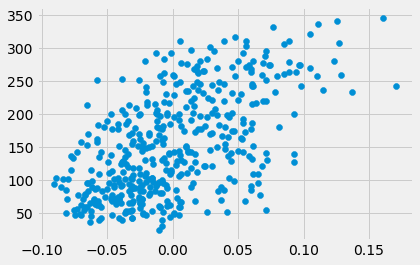

In [11]:
plt.scatter(df['bmi'], df['progression'])

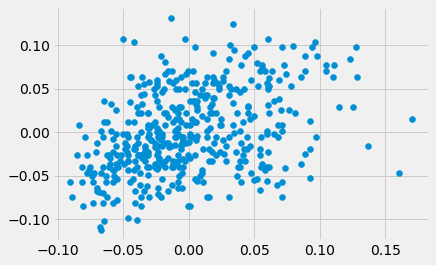

In [12]:
plt.scatter(df['bmi'], df['bp'])

Or, alternatively, you can use Pandas' built-in matplotlib methods:

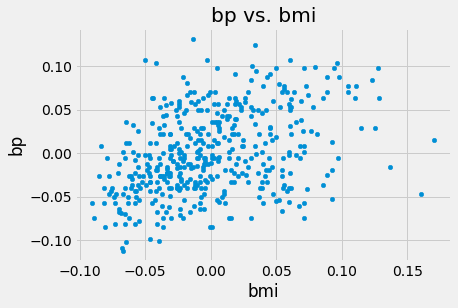

In [13]:
x = "bmi"
y = "bp"

df.plot(x, y, kind = "scatter")
plt.title("{} vs. {}".format(y,x));

(Note that it's the same plot! That's not a coincidence, pandas just wrote the basic plot code for you.) 

Let's do one more, I think it will be illustrative.

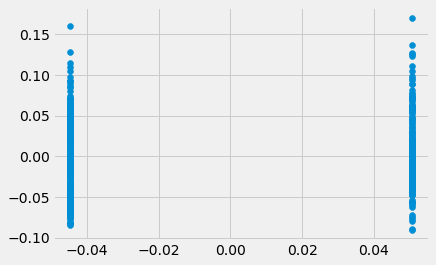

In [14]:
plt.scatter(df['sex'], df['bmi'])

That previous graph isn't very helpful, because they've listed sex as two values (presumably male/female, but it's not immediately obvious which is which! To make a better guess, we could graph histograms:

(array([ 6., 21., 58., 51., 27., 22., 12.,  5.,  4.,  1.]),
 array([-0.0902753 , -0.06419224, -0.03810919, -0.01202614,  0.01405691,
         0.04013997,  0.06622302,  0.09230607,  0.11838912,  0.14447217,
         0.17055523]),
 <BarContainer object of 10 artists>)

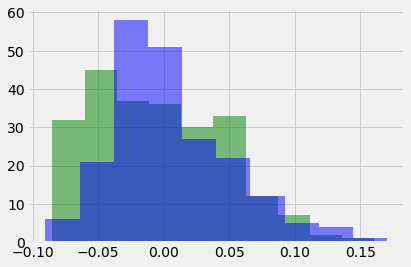

In [15]:
plt.hist(df[df["sex"] < 0]["bmi"], alpha=0.5, color='g')
plt.hist(df[df["sex"] > 0]["bmi"], alpha=0.5, color='b')

I suspect, from the little I know about BMI, that green (negative sex) is male, and blue (positive sex) is female.

Now, we could continue doing this for each pair of features, and we could also write a for loop to make that simpler, but there are tools that make it even easier for us. It pairs up all the given columns. It takes a really long time to run with 10 columns (producing 100 graphs at once!), so I reduce it.

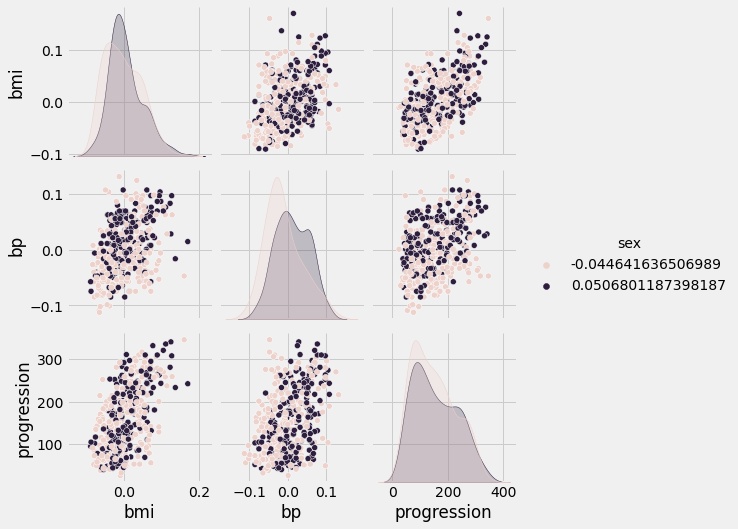

In [16]:
df_fewer_columns = df[['bmi', 'bp','progression', 'sex']]

sns.pairplot(df_fewer_columns, hue='sex');

There are a few in there on the diagonal, so those are `x` against `x` for each feature `x`.  Those are _histograms_, and they help you to digest a column of data.

### Subplots in Matplotlib 

To show one more bit about matplotlib, our main plotting library, we'll use another famous dataset: [Anscombe's Quartet](https://en.wikipedia.org/wiki/Anscombe's_quartet). (By the way, double-click on this cell to edit the markdown, and view how links work.  You should definitely use links to format things!)

In [17]:
## Anscombe's Quartet

ansc = pd.DataFrame({'x1':[10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0],
                     'y1':[8.04, 6.95, 7.58,  8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
                     'x2':[10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0],
                     'y2':[9.14, 8.14, 8.74,  8.77, 9.26, 8.10, 6.13, 3.10, 9.13,  7.26, 4.74],
                     'x3':[10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0],
                     'y3':[7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15,  6.42, 5.73],
                     'x4':[8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0],
                     'y4':[6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]})

ansc.head()

,x1,y1,x2,y2,x3,y3,x4,y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47


Let's begin by checking out the data.

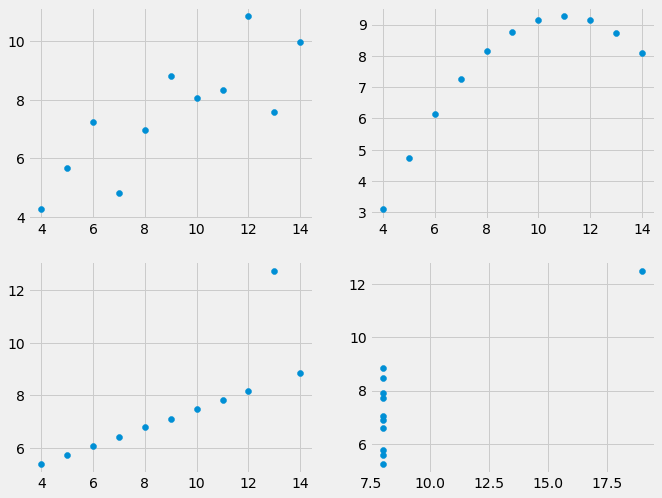

In [18]:
figure = plt.figure(figsize=(10,8))
axs = [figure.add_subplot(2,2,i) for i in range(1,5)]

for i in range(1,5):
    axs[i-1].scatter(ansc['x'+str(i)], ansc['y'+str(i)]);

The incredible thing about Anscombe's quartet is that it's four different datasets, all with the same means, variances, correlation, and linear regression line.  Let's check these facts!

In [19]:
!python --version


Python 3.8.5


In [20]:
print("Means of the x's:","","", *[ansc['x{}'.format(i+1)].mean() for i in range(4)], sep='\t')
print("Variances of the x's:","","", *[ansc['x{}'.format(i+1)].var() for i in range(4)], sep='\t')
print("Means of the y's:","","", *[ansc['y{}'.format(i+1)].mean().round(3) for i in range(4)], sep='\t')
print("Variances of the y's:","","", *[ansc['y{}'.format(i+1)].var().round(3) for i in range(4)], sep='\t')
print("Correlations between the x's and y's:",
      *[ansc[['x{}'.format(i+1),'y{}'.format(i+1)]].corr().values[0,1].round(3) for i in range(4)], sep='\t')

Means of the x's:			9.0	9.0	9.0	9.0
Variances of the x's:			11.0	11.0	11.0	11.0
Means of the y's:			7.501	7.501	7.5	7.501
Variances of the y's:			4.127	4.128	4.123	4.123
Correlations between the x's and y's:	0.816	0.816	0.816	0.817


That looks a bit messy.  What's going on here is I'm using what's called a [list comprehension](https://docs.python.org/3.6/tutorial/datastructures.html#list-comprehensions), whose basic syntax is:

```
[<expression> for <item> in <iterable> if <condition>]
```

and the condition is optional.  For example, from the first code cell up top:

In [21]:
[str(x) + " is prime!"  for x in range(2,30) if is_prime(x)]

NameError: name 'is_prime' is not defined

This populates a list with `x`s (the expression could be any function of `x`) for each `x` in the given range, provided that `x` is prime.

The last thing to note is the _splat operator_, AKA putting a star before a list.  That unpacks a list, and it's best explained by example:

In [ ]:
print("Without splat:", [1,2,3,4,5], sep="_SEP_")
print("With splat:", *[1,2,3,4,5], sep="_SEP_")

Okay, so we've seen that the data sets have everything in common, except for the fact that their linear regression lines are the same.  To finish, let's compute those and add them to our plots.  Here, we're using [Scikit-Learn](http://scikit-learn.org/stable/), the machine learning library for Python.

In [22]:
models = []

for i in range(4):
    # Create the regression model object
    model = LinearRegression()
    
    # Fit the model to our data.  Note that when you have a one dimensional input, you need to reshape
    model.fit(ansc['x'+str(i+1)].values.reshape(-1,1), ansc['y'+str(i+1)])
    
    models.append(model)
    
print("Slopes of the regression lines:", "", *[round(models[i].coef_[0], 3) for i in range(4)], sep='\t')
print("Intercepts of the regression lines:", *[round(models[i].intercept_) for i in range(4)], sep='\t')

Slopes of the regression lines:		0.5	0.5	0.5	0.5
Intercepts of the regression lines:	3	3	3	3


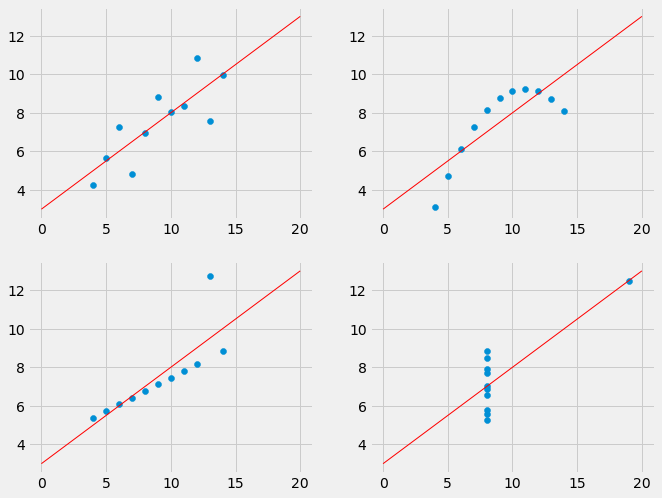

In [23]:
figure = plt.figure(figsize=(10,8))
axs = [figure.add_subplot(2,2,i) for i in range(1,5)]

for i in range(1,5):
    axs[i-1].scatter(ansc['x'+str(i)].values.reshape(-1,1), ansc['y'+str(i)])
    m, b = (models[i-1].coef_[0],models[i-1].intercept_)
    axs[i-1].plot([0, 20], [b, m * 20 + b], 'r-', linewidth=1)

What a curious dataset!  It was handmade to demonstrate the importance of data visualization.